In [122]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
import optuna

In [105]:
df=pd.read_csv("train.csv")
df.shape

(8693, 14)

# Data preprocessing

In [106]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [107]:
df.drop(columns=['PassengerId', 'Name'], inplace=True)


In [108]:
for col in ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']:
    df[col].fillna(df[col].mode()[0], inplace=True)

for col in ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    df[col].fillna(df[col].median(), inplace=True)


In [109]:
encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col])


In [110]:
df.dtypes

HomePlanet      int32
CryoSleep       int64
Cabin           int32
Destination     int32
Age             int64
VIP             int64
RoomService     int64
FoodCourt       int64
ShoppingMall    int64
Spa             int64
VRDeck          int64
Transported     int64
dtype: object

In [113]:
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,149,2,39,0,0,0,0,0,0,0
1,0,0,2184,2,24,0,109,9,25,456,44,1
2,1,0,1,2,58,1,43,1206,0,1273,49,0
3,1,0,1,2,33,0,0,806,332,1132,187,0
4,0,0,2186,2,16,0,277,69,149,470,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,146,0,41,1,0,1389,0,932,74,0
8689,0,1,5280,1,18,0,0,0,0,0,0,0
8690,0,0,5285,2,26,0,0,0,972,1,0,1
8691,1,0,2131,0,32,0,0,739,0,321,1113,0


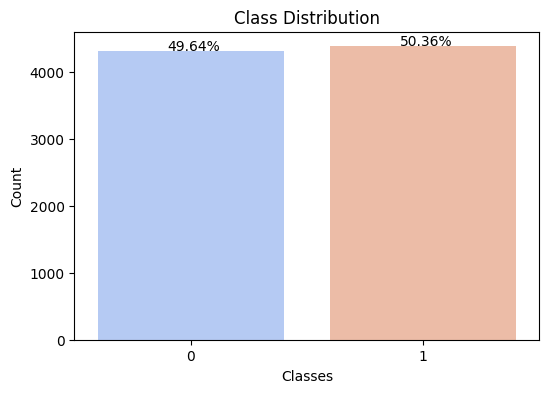

In [115]:

# Assuming 'target' is your label column
plt.figure(figsize=(6,4))
sns.countplot(x=df['Transported'], palette="coolwarm")

# Show percentages on the bars
total = len(df)
for p in plt.gca().patches:
    percentage = f"{100 * p.get_height() / total:.2f}%"
    plt.gca().annotate(percentage, (p.get_x() + 0.3, p.get_height() + 10))

plt.title("Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()


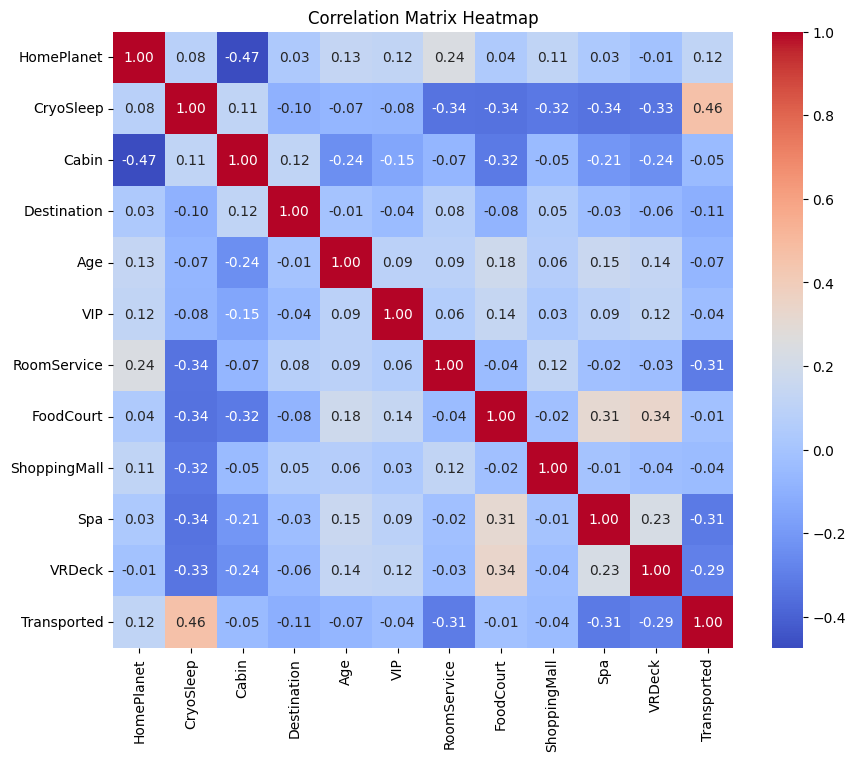

In [ ]:
corr_matrix= df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,149,2,39,0,0,0,0,0,0,0
1,0,0,2184,2,24,0,109,9,25,456,44,1
2,1,0,1,2,58,1,43,1206,0,1273,49,0
3,1,0,1,2,33,0,0,806,332,1132,187,0
4,0,0,2186,2,16,0,277,69,149,470,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,146,0,41,1,0,1389,0,932,74,0
8689,0,1,5280,1,18,0,0,0,0,0,0,0
8690,0,0,5285,2,26,0,0,0,972,1,0,1
8691,1,0,2131,0,32,0,0,739,0,321,1113,0


# Model training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def objective(trial):
    # Hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 50, 500, step=50)
    max_depth = trial.suggest_int('max_depth', 5, 50, step=5)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    # Define model
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        n_jobs=-1
    )

    # Perform cross-validation
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score  # Maximize accuracy   

In [ ]:
study = optuna.create_study(direction='maximize')  # We want to maximize accuracy
study.optimize(objective, n_trials=100)  # Run 50 trials (adjust as needed)

# Print best hyperparameters
print("Best Hyperparameters:", study.best_params)


[I 2025-03-09 00:33:56,547] A new study created in memory with name: no-name-cb8de215-f955-4670-ae5c-866092db9da2
[I 2025-03-09 00:33:59,894] Trial 0 finished with value: 0.8016978624145976 and parameters: {'n_estimators': 200, 'max_depth': 25, 'min_samples_split': 14, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 0 with value: 0.8016978624145976.
[I 2025-03-09 00:34:05,546] Trial 1 finished with value: 0.8018418507465774 and parameters: {'n_estimators': 350, 'max_depth': 15, 'min_samples_split': 19, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.8018418507465774.
[I 2025-03-09 00:34:13,537] Trial 2 finished with value: 0.799828289776518 and parameters: {'n_estimators': 450, 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 1 with value: 0.8018418507465774.
[I 2025-03-09 00:34:14,733] Trial 3 finished with value: 0.7983904752545914 and parameters: {'n_estimators': 50, 'max_depth': 30, 'm

Best Hyperparameters: {'n_estimators': 350, 'max_depth': 35, 'min_samples_split': 16, 'min_samples_leaf': 10, 'max_features': 'sqrt'}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators= 350, max_depth= 35, min_samples_split= 16, min_samples_leaf= 10, max_features= 'sqrt')
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=35, min_samples_leaf=10, min_samples_split=16,
                       n_estimators=350)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.7924094307073031
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       861
           1       0.77      0.83      0.80       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



# Xg boost

In [132]:
model = xgb.XGBClassifier(
    n_estimators=320,        # Number of trees
    max_depth=6,             # Tree depth
    learning_rate=0.1,       # Step size shrinkage
    subsample=0.8,           # Sample ratio per tree
    colsample_bytree=0.8,    # Feature selection for each tree
    objective="binary:logistic",  # Binary classification
    eval_metric="logloss",
    use_label_encoder=False
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Model Accuracy: {accuracy:.4f}")

c:\Users\nkrdh\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [00:59:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Accuracy: 0.7844


In [133]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', penalty='l2', max_iter=500)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.7729
